<a href="https://colab.research.google.com/github/joaopdss/fer-playing-games/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/drive/MyDrive/Datasets/fer_dataset.zip -d /content/

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_data, val_data = tf.keras.utils.image_dataset_from_directory(directory="/content/dataset",
                                            color_mode="rgb",
                                            label_mode="categorical",
                                            batch_size=32,
                                            image_size=(48, 48),
                                            shuffle=True,
                                            seed=42,
                                            validation_split=0.2,
                                            subset="both")

Found 40476 files belonging to 5 classes.
Using 32381 files for training.
Using 8095 files for validation.


In [7]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [23]:
train_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

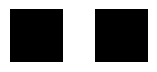

In [14]:
for images, labels in train_data.take(1):
  for i in range(2):
    ax = plt.subplot(6, 6, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [8]:
# batch size 64
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(48, 48, 3)),
  tf.keras.layers.Conv2D(512, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(5, activation="softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=8, min_lr=0.00001)

# Fit the model
model_1.fit(train_data, epochs=8, callbacks=[reduce_lr, checkpoint_callback], validation_data=val_data)

Epoch 1/8
1012/1012 [==============================] - ETA: 0s - loss: 1.7265 - accuracy: 0.2540
Epoch 1: val_loss improved from inf to 1.53208, saving model to checkpoint/


1012/1012 [==============================] - 122s 110ms/step - loss: 1.7265 - accuracy: 0.2540 - val_loss: 1.5321 - val_accuracy: 0.3401 - lr: 0.0010
Epoch 2/8
1012/1012 [==============================] - ETA: 0s - loss: 1.4710 - accuracy: 0.3602
Epoch 2: val_loss did not improve from 1.53208
1012/1012 [==============================] - 101s 100ms/step - loss: 1.4710 - accuracy: 0.3602 - val_loss: 1.6340 - val_accuracy: 0.2007 - lr: 0.0010
Epoch 3/8
1012/1012 [==============================] - ETA: 0s - loss: 1.3190 - accuracy: 0.4498
Epoch 3: val_loss improved from 1.53208 to 1.29927, saving model to checkpoint/


1012/1012 [==============================] - 107s 106ms/step - loss: 1.3190 - accuracy: 0.4498 - val_loss: 1.2993 - val_accuracy: 0.4618 - lr: 0.0010
Epoch 4/8
1012/1012 [==============================] - ETA: 0s - loss: 1.1936 - accuracy: 0.5118
Epoch 4: val_loss improved from 1.29927 to 1.06355, saving model to checkpoint/


1012/1012 [==============================] - 107s 106ms/step - loss: 1.1936 - accuracy: 0.5118 - val_loss: 1.0635 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 5/8
1012/1012 [==============================] - ETA: 0s - loss: 1.1015 - accuracy: 0.5524
Epoch 5: val_loss did not improve from 1.06355
1012/1012 [==============================] - 100s 98ms/step - loss: 1.1015 - accuracy: 0.5524 - val_loss: 1.1675 - val_accuracy: 0.5508 - lr: 0.0010
Epoch 6/8
1012/1012 [==============================] - ETA: 0s - loss: 1.0494 - accuracy: 0.5757
Epoch 6: val_loss improved from 1.06355 to 0.98346, saving model to checkpoint/


1012/1012 [==============================] - 102s 101ms/step - loss: 1.0494 - accuracy: 0.5757 - val_loss: 0.9835 - val_accuracy: 0.6189 - lr: 0.0010
Epoch 7/8
1012/1012 [==============================] - ETA: 0s - loss: 1.0086 - accuracy: 0.5983
Epoch 7: val_loss did not improve from 0.98346
1012/1012 [==============================] - 100s 98ms/step - loss: 1.0086 - accuracy: 0.5983 - val_loss: 1.0018 - val_accuracy: 0.6163 - lr: 0.0010
Epoch 8/8
1012/1012 [==============================] - ETA: 0s - loss: 0.9673 - accuracy: 0.6150
Epoch 8: val_loss improved from 0.98346 to 0.92080, saving model to checkpoint/


1012/1012 [==============================] - 102s 101ms/step - loss: 0.9673 - accuracy: 0.6150 - val_loss: 0.9208 - val_accuracy: 0.6441 - lr: 0.0010
